In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['image.cmap'] = 'jet'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from flow_sim import compute_solution

Задача нейронной сети воспроизвести симулятор, который возвращает значение решения системы дифференциальных уравнений в заданной точке пространства $x$ и в заданный момент времени $t$.

На данный момент, уравнение в частных производных является одномерным по пространству.

Возвращаемые значения: $p(t,x)$ - давление, $\nabla p(t,x)$ - градиент давления, $s_w(t,x)$ - насыщенность водой, $s_o(t,x)$ - насыщенность нефтью, $u_w(t,x)$ - скорость потока воды, $u_o(t,x)$ - скорость потока нефти.

Лоссы для нейорнки строятся следующим образом: граничные + начальные условия, близость значений к тем, которые предсказывает симулятор, лосс, принуждающий к соблюдению законов сохранения.

Для законов сохранения будет предусмотрено две формы лосс-функции, которые и будут сравниваться между собой (aka предмет исследований).


inside the main funciton


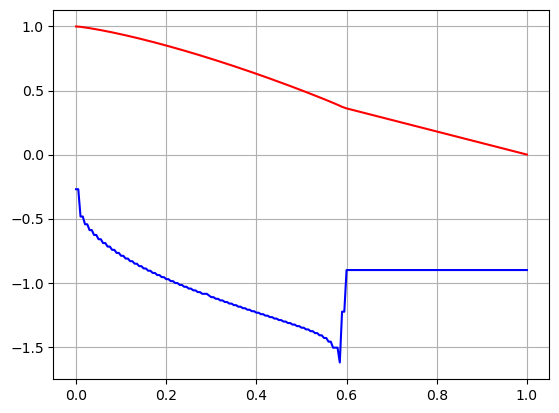

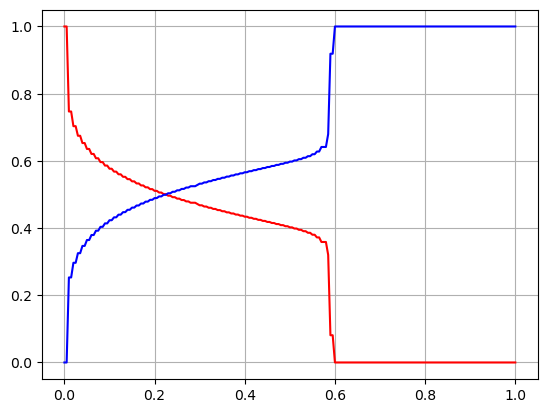

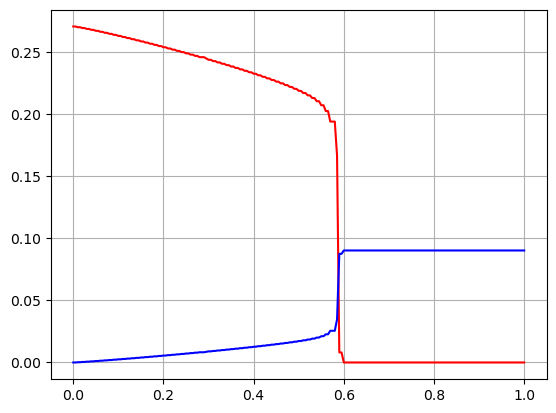

0

In [2]:
def main():
    print('inside the main funciton')
    # numerical_solution_test()
    t = 0.1
    x = 0.6

    numx = 200
    x = np.linspace(0.0, 1.0, numx + 1)
    pv = 0.0 * x
    pg = 0.0 * x
    sw = 0.0 * x
    so = 0.0 * x
    uw = 0.0 * x
    uo = 0.0 * x
    for idx in range(numx + 1):
        press, pgrad, s_wat, s_oil, u_wat, u_oil = compute_solution(t, x[idx], nx=100)
        pv[idx] = press
        pg[idx] = pgrad
        sw[idx] = s_wat
        so[idx] = s_oil
        uw[idx] = u_wat
        uo[idx] = u_oil

    plt.figure()
    plt.plot(x, pv, c='r')
    plt.plot(x, pg, c='b')
    plt.grid()
    plt.show()

    plt.figure()
    plt.plot(x, sw, c='r')
    plt.plot(x, so, c='b')
    plt.grid()
    plt.show()

    plt.figure()
    plt.plot(x, uw, c='r')
    plt.plot(x, uo, c='b')
    plt.grid()
    plt.show()

    return 0

main()